In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import the Data

In [2]:
students_df = pd.read_csv('students.csv', encoding= 'unicode_escape')
course_activity_df = pd.read_csv('course_activity.csv', encoding= 'unicode_escape')
feedback_df = pd.read_csv('feedback.csv', encoding= 'unicode_escape')

# To check Rows and Columns 

In [3]:
students_df.shape

(100, 6)

In [4]:
feedback_df.shape

(80, 4)

In [5]:
course_activity_df.shape

(659, 5)

# To check Data Type

In [6]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [7]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [8]:
course_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.9+ KB


# To check null values or missing values

In [9]:
pd.isnull(students_df).sum()

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

In [10]:
pd.isnull(feedback_df).sum()

Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64

In [11]:
pd.isnull(course_activity_df).sum()

Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

# To check the top 5 data

In [12]:
students_df.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


In [13]:
feedback_df.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [14]:
course_activity_df.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


# To check Duplicate Values

In [15]:
students_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [16]:
feedback_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [17]:
course_activity_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
654    False
655    False
656    False
657    False
658    False
Length: 659, dtype: bool

#  Exploratory Data Analysis

### Overall Average Completion Rate

In [18]:
overall_avg_completion = course_activity_df['Completion_Percentage'].mean()
print("Overall Average Completion Rate: {:.2f}%".format(overall_avg_completion))

Overall Average Completion Rate: 54.78%


###  Highest and Lowest Average Engagement Time by Course

In [19]:
engagement_by_course = course_activity_df.groupby("Course_ID")['Time_Spent_Minutes'].mean()

print("Highest Avg Engagement Time:\n", engagement_by_course.max())
print("Lowest Avg Engagement Time:\n",  engagement_by_course.min())

Highest Avg Engagement Time:
 102.42767295597484
Lowest Avg Engagement Time:
 93.90243902439025


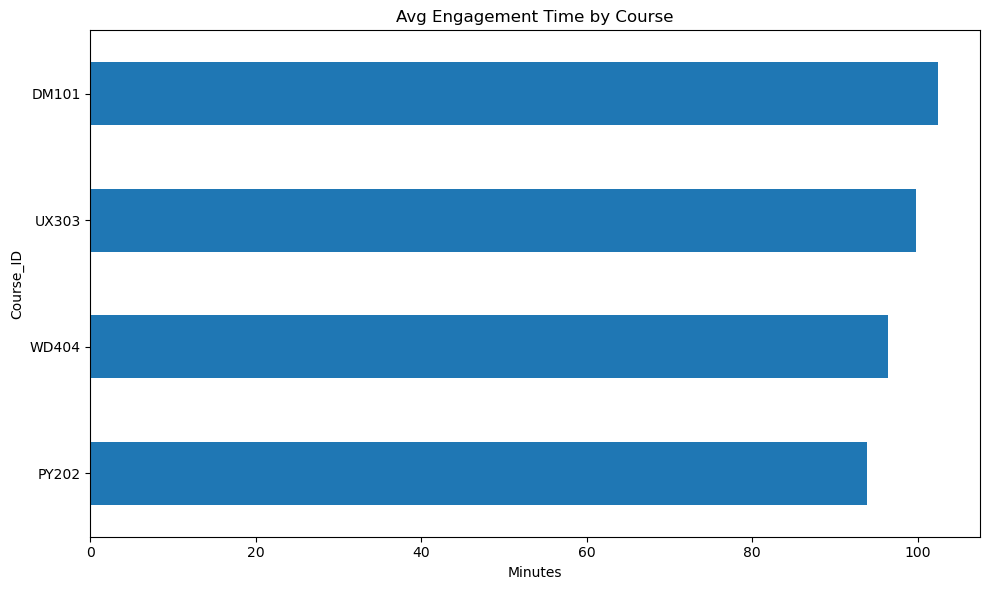

In [20]:
# plot
engagement_by_course.sort_values().plot(kind='barh', figsize=(10, 6), title="Avg Engagement Time by Course")
plt.xlabel("Minutes")
plt.tight_layout()
plt.show()

### Engagement by Age Group and Location

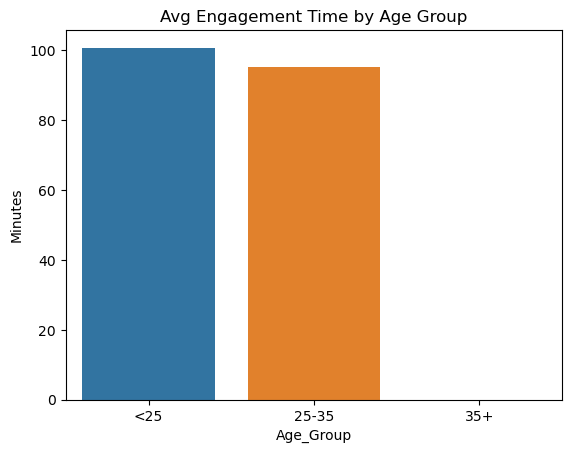

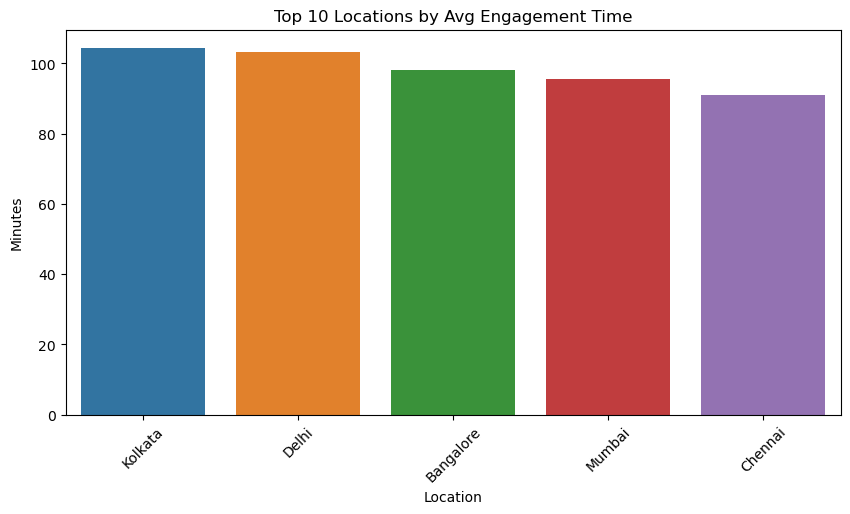

In [21]:
# Merge student info
merged_df = pd.merge(course_activity_df, students_df, on="Student_ID")
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[0, 25, 35, 100], labels=["<25", "25-35", "35+"])

# Engagement by Age Group
age_group_engagement = merged_df.groupby("Age_Group")["Time_Spent_Minutes"].mean().reset_index()

sns.barplot(data=age_group_engagement, x="Age_Group", y="Time_Spent_Minutes")
plt.title("Avg Engagement Time by Age Group")
plt.ylabel("Minutes")
plt.show()

# Engagement by Location (Top 10)
location_engagement = merged_df.groupby("Location")["Time_Spent_Minutes"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=location_engagement.index, y=location_engagement.values)
plt.title("Top 10 Locations by Avg Engagement Time")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()

### Average Feedback Rating per Course

Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


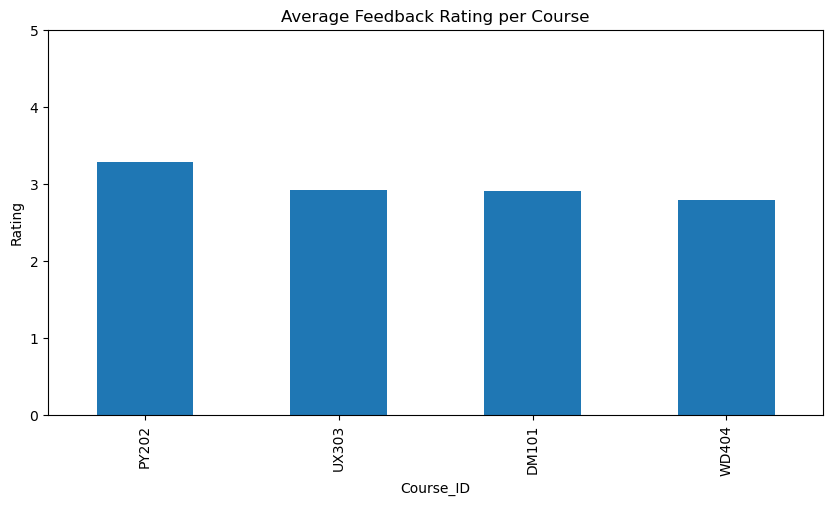

In [22]:
avg_rating = feedback_df.groupby("Course_ID")["Rating"].mean().sort_values(ascending=False)
print(avg_rating)

# Plot
avg_rating.plot(kind='bar', figsize=(10, 5), title="Average Feedback Rating per Course")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.show()

### Correlation between completion rate and feedback rating

Correlation between Completion % and Feedback Rating: -0.05


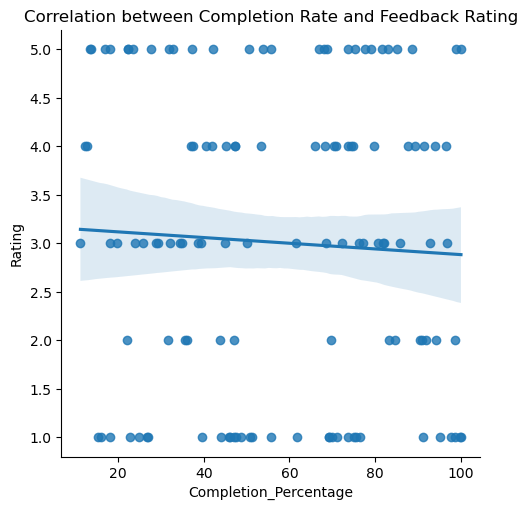

In [23]:
merged_feedback = pd.merge(course_activity_df, feedback_df, on=["Student_ID", "Course_ID"])
correlation = merged_feedback[['Completion_Percentage', 'Rating']].corr().iloc[0, 1]
print("Correlation between Completion % and Feedback Rating: {:.2f}".format(correlation))

sns.lmplot(data=merged_feedback, x="Completion_Percentage", y="Rating")
plt.title("Correlation between Completion Rate and Feedback Rating")
plt.show()

### Top 3 student segments based on engagement and satisfaction.

In [24]:
student_engagement = course_activity_df.groupby("Student_ID")["Time_Spent_Minutes"].sum().reset_index()
student_feedback = feedback_df.groupby("Student_ID")["Rating"].mean().reset_index()

summary = pd.merge(student_engagement, student_feedback, on="Student_ID")
top_segments = summary.sort_values(by=["Time_Spent_Minutes", "Rating"], ascending=False).head(3)
print("Top 3 Student Segments:\n", top_segments)

Top 3 Student Segments:
    Student_ID  Time_Spent_Minutes  Rating
29       S042                1329     1.0
50       S066                1158     2.0
60       S077                1121     5.0


# Bar Chart: Engagement by Course

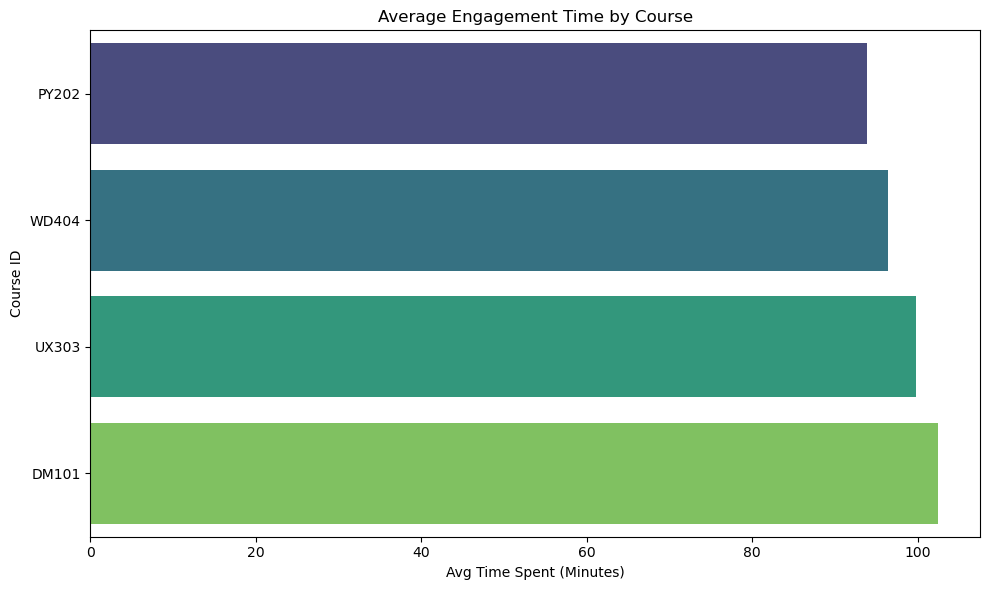

In [25]:
engagement_by_course = course_activity_df.groupby("Course_ID")['Time_Spent_Minutes'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_course.values, y=engagement_by_course.index, palette="viridis")
plt.title("Average Engagement Time by Course")
plt.xlabel("Avg Time Spent (Minutes)")
plt.ylabel("Course ID")
plt.tight_layout()
plt.show()

# Box Plot: Engagement by Age Group

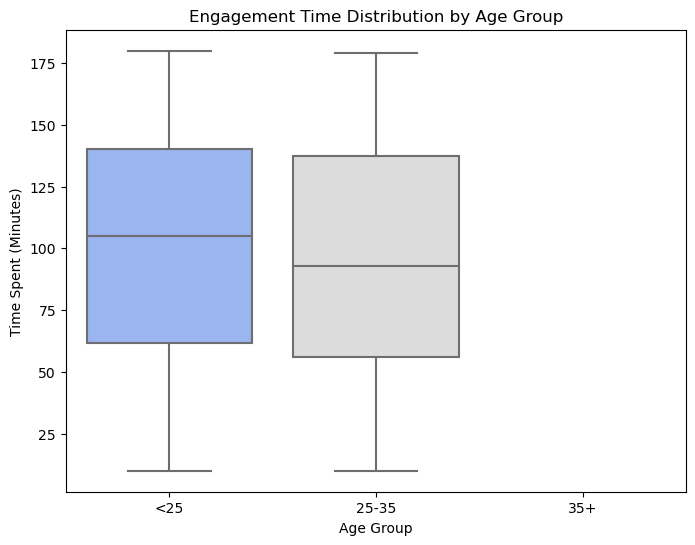

In [26]:
merged_df = pd.merge(course_activity_df, students_df, on="Student_ID")
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[0, 25, 35, 100], labels=["<25", "25-35", "35+"])

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x="Age_Group", y="Time_Spent_Minutes", palette="coolwarm")
plt.title("Engagement Time Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")
plt.show()


# Scatter Plot: Engagement vs Feedback Rating

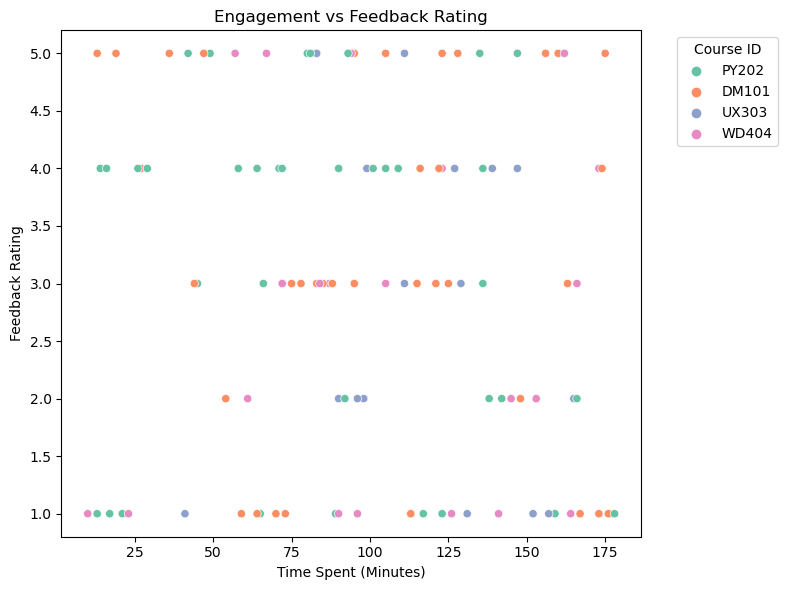

In [27]:
merged_feedback = pd.merge(course_activity_df, feedback_df, on=["Student_ID", "Course_ID"])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_feedback, x="Time_Spent_Minutes", y="Rating", hue="Course_ID", palette="Set2")
plt.title("Engagement vs Feedback Rating")
plt.xlabel("Time Spent (Minutes)")
plt.ylabel("Feedback Rating")
plt.legend(title="Course ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line Chart: Completion Trends Over Time

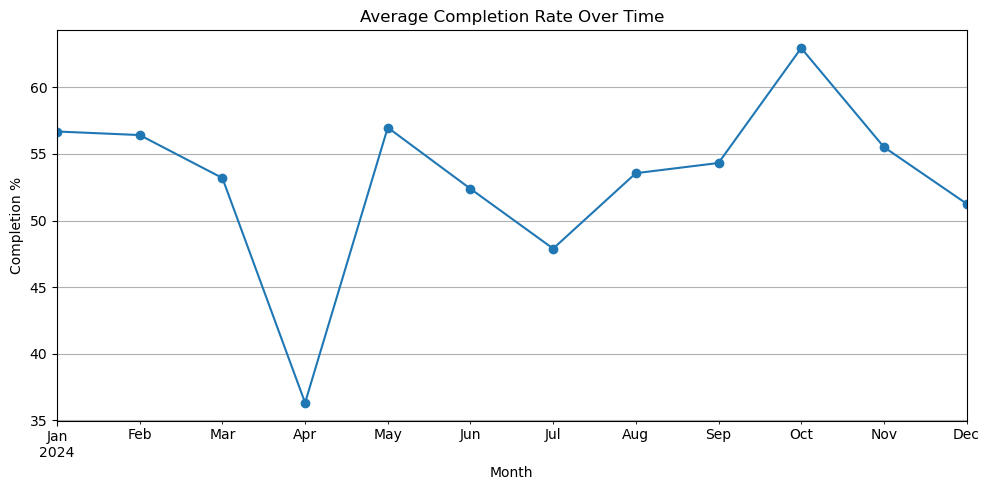

In [31]:
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], errors='coerce')
completion_trend = course_activity_df.groupby(course_activity_df['Date'].dt.to_period('M'))['Completion_Percentage'].mean()

completion_trend.plot(kind='line', marker='o', figsize=(10, 5), title='Average Completion Rate Over Time')
plt.ylabel("Completion %")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()
